This code is used for applying CycleGAN on the final video
===

In [1]:
# imports
import os
import matplotlib.pyplot as plt
from frame_video_convert import image_seq_to_video


In [2]:
# clone CycleGAN
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

# change dir to the repository
os.chdir('pytorch-CycleGAN-and-pix2pix/')

# install requirements
!pip install -r requirements.txt


fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


In [3]:
#download pretraind CycleGAN
!bash ./scripts/download_cyclegan_model.sh style_vangogh

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_vangogh]
for details.

--2020-06-29 09:52:00--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  14.3MB/s    in 3.0s    

2020-06-29 09:52:03 (14.3 MB/s) - ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [4]:
# apply CycleGAN
!python test.py --dataroot ../drive/My\ Drive/Courses/computer_vision/hw4/video_frames\
 --name style_vangogh_pretrained --model test --no_dropout --num_test 300\
 --aspect_ratio 1.778 --crop_size 720 --load_size 720

----------------- Options ---------------
             aspect_ratio: 1.778                         	[default: 1.0]
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 720                           	[default: 256]
                 dataroot: ../drive/My Drive/Courses/computer_vision/hw4/video_frames	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None

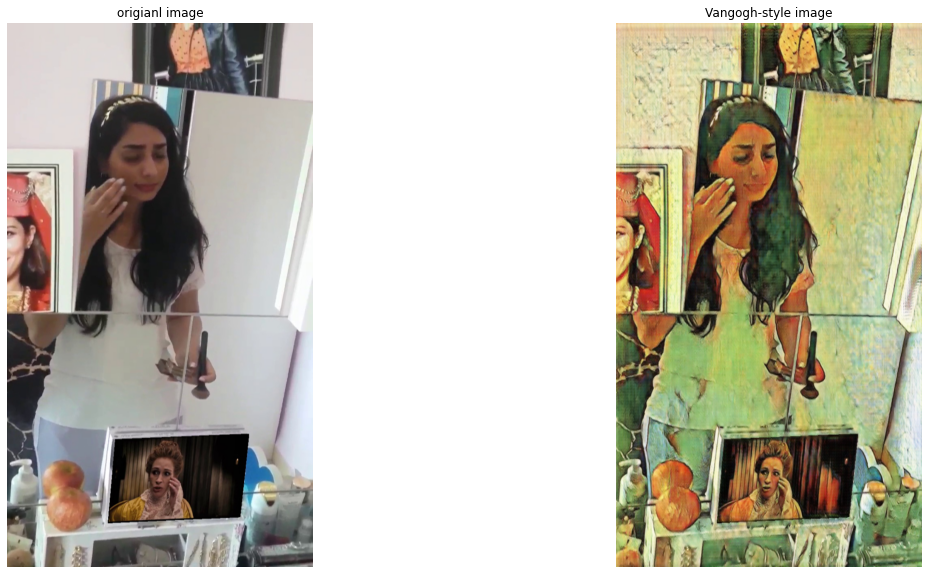

In [5]:
# plot images

frame_num1 = 200


# take the real image
real_img = plt.imread('./results/style_vangogh_pretrained/\
test_latest/images/0' + str(frame_num1) + '_real.png')

# take the fake image
fake_img = plt.imread('./results/style_vangogh_pretrained/\
test_latest/images/0' + str(frame_num1) + '_fake.png')

# display the images
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(real_img)
ax1.set_title("origianl image")
ax1.set_axis_off()
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fake_img)
ax2.set_title("Vangogh-style image")
ax2.set_axis_off()


In [6]:
# remove real images from folder
%cd ./results/style_vangogh_pretrained/test_latest/images
!rm *real* 
%cd ../../../..

/content/pytorch-CycleGAN-and-pix2pix/results/style_vangogh_pretrained/test_latest/images
/content/pytorch-CycleGAN-and-pix2pix


In [7]:
# create video

images_path = "./results/style_vangogh_pretrained/test_latest/images"
output_path = "../output/vid2vid.mp4"

image_seq_to_video(images_path, output_path=output_path, fps=30.0)


(720, 1280)
writing video...
saved video @  ../output/vid2vid.mp4
